In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')
index = pd.read_csv('../input/index.csv')

In [3]:
print("Training data size",train_data.shape)
print("Test data size",test_data.shape)

Training data size (1225029, 3)
Test data size (117703, 2)


In [4]:
print("Unique landmark_id: ",len(train_data.groupby("landmark_id")["landmark_id"]))

Unique landmark_id:  14952


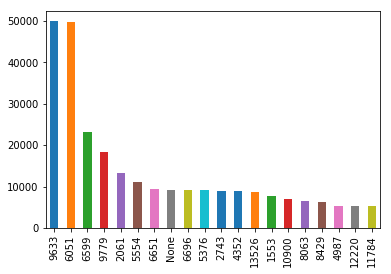

In [5]:
train_data['landmark_id'].value_counts().head(20).plot.bar()

In [6]:
# missing data in train data 
print("Missing landmark_id: ",train_data['landmark_id'].value_counts()["None"])
print("Missing url: ",train_data['url'].value_counts()["None"])

Missing landmark_id:  9260
Missing url:  9260


In [7]:
# missing data in test data 
print("Missing url: ",test_data['url'].value_counts()["None"])

Missing url:  2989


In [8]:
# landmark_id with low count
values_count = pd.DataFrame(train_data['landmark_id'].value_counts())
values_count.columns = ["count"]
low_values_count = values_count[values_count["count"] < 10]
low_values_count

,count
12788,9
13953,9
10658,9
5034,9
1423,9
4883,9
3959,9
12164,9
11688,9
5194,9


In [9]:
len(low_values_count)

6190

In [10]:
high_values_count = values_count[values_count["count"] >= 8000]
high_values_count

,count
9633,50010
6051,49806
6599,23218
9779,18309
2061,13183
5554,11033
6651,9444
None,9260
6696,9161
5376,9161


In [11]:
len(high_values_count)

13

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))


In [13]:
category = train_data['landmark_id'].value_counts().keys()[0]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")


In [56]:
csvreader = pd.read_csv("../input/train.csv")
csvreader = csvreader[csvreader['landmark_id'] != 'None']
csvreader = csvreader[csvreader['landmark_id'].isin(csvreader['landmark_id'].value_counts().head(10).index.values)]
csvreader.groupby('landmark_id', group_keys=False).apply(lambda df: df.sample(100, random_state=1)).equals(csvreader.groupby('landmark_id', group_keys=False).apply(lambda df: df.sample(100,random_state=1)))

True